In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/hotel.csv')
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [4]:
df.shape # Number of rows and columns in hotel review dataset

(6448, 3)

In [5]:
df['Location'].isna().sum()  # Location column is having 4737 NaN values

4737

In [6]:
df['date'].isna().sum()  # date column has no NaN value

0

In [7]:
df['Review'].isna().sum() # Review column is having 55 NaN values

55

In [8]:
df = df[df['Review'].notna()]

In [9]:
df['Review'].isna().sum()

0

In [10]:
import seaborn as sns

In [11]:
df['year'] = pd.DatetimeIndex(df['date']).year      # Extracting year from date
df['month'] = pd.DatetimeIndex(df['date']).month    # Extracting month from date
df.head()

,Review,date,Location,year,month
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,2019,8
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,2019,8
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,2019,8
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,2019,8
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,2019,8


In [12]:
df['month'].value_counts()  
# Grouping the reviews categorically
# August month has the highest bookings and june has the lowest 

8     722
12    626
3     603
4     583
7     547
5     521
10    520
11    515
1     504
9     478
2     412
6     362
Name: month, dtype: int64

In [13]:
import spacy
from spacy import displacy

In [14]:
nlp = spacy.load('en_core_web_sm')   # Loading English language small version

In [15]:
text = 'this is the first document. this document is the second document. and this is the third one. is this the first document.'

In [16]:
doc = nlp(text)

In [17]:
doc  # We can't see any changes but there is a lot of information in doc

this is the first document. this document is the second document. and this is the third one. is this the first document.

In [18]:
for token in doc:            # Creating tokens from the document
    print(token)

this
is
the
first
document
.
this
document
is
the
second
document
.
and
this
is
the
third
one
.
is
this
the
first
document
.


In [19]:
sent = nlp.create_pipe('sentencizer')

In [20]:
nlp.add_pipe(sent,before='parser')

In [21]:
doc = nlp(text)

In [22]:
for sent in doc.sents:
    print(sent)

this is the first document.
this document is the second document.
and this is the third one.
is this the first document.


In [23]:
from spacy.lang.en.stop_words import STOP_WORDS     # Importing English language stop words

In [24]:
stopwords = list(STOP_WORDS)
stopwords

['any',
 'toward',
 'regarding',
 'you',
 'a',
 'please',
 'hereafter',
 'our',
 'few',
 'wherein',
 'formerly',
 'almost',
 'whether',
 'whereupon',
 'latterly',
 'as',
 'above',
 'your',
 'twenty',
 'of',
 'within',
 '’re',
 "'ve",
 '’m',
 'amongst',
 'thereby',
 "'ll",
 'whoever',
 'even',
 'doing',
 'unless',
 'how',
 'when',
 '’d',
 'fifty',
 'rather',
 'sometimes',
 'can',
 'bottom',
 'again',
 'so',
 'seems',
 'another',
 'yet',
 'put',
 'front',
 'hence',
 'i',
 'thus',
 'six',
 'sixty',
 'except',
 'those',
 'whenever',
 'an',
 'its',
 'others',
 'must',
 'together',
 'nothing',
 'made',
 'once',
 'show',
 'per',
 'go',
 'anyone',
 'therein',
 'one',
 'before',
 'meanwhile',
 'seemed',
 'have',
 'thereafter',
 'here',
 'has',
 'herein',
 'various',
 'own',
 'yourself',
 'becoming',
 'move',
 'why',
 'indeed',
 'same',
 'top',
 'always',
 'behind',
 'other',
 'wherever',
 'anything',
 'side',
 'them',
 'this',
 'eight',
 'much',
 'namely',
 'be',
 '‘ve',
 'hereupon',
 'neverthe

In [25]:
len(stopwords)

326

In [26]:
for token in doc:
    if token.is_stop == False:
        print(token)

document
.
document
second
document
.
.
document
.


## Lemmatization:

In [27]:
for lem in doc:                    # Converting the words to the root forms
    print(lem.text, lem.lemma_)

this this
is be
the the
first first
document document
. .
this this
document document
is be
the the
second second
document document
. .
and and
this this
is be
the the
third third
one one
. .
is be
this this
the the
first first
document document
. .


## Part of speech:

In [28]:
for token in doc:                   # We can check the part of speech for all the words present in corpus
    print(token.text,token.pos_)

this DET
is AUX
the DET
first ADJ
document NOUN
. PUNCT
this DET
document NOUN
is AUX
the DET
second ADJ
document NOUN
. PUNCT
and CCONJ
this DET
is AUX
the DET
third ADJ
one NOUN
. PUNCT
is AUX
this DET
the DET
first ADJ
document NOUN
. PUNCT


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [30]:
data_yelp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment dataset/yelp.txt', sep='\t', header = None)
data_yelp.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [31]:
columns_name = ['Review', 'Sentiment']     # Renaming the columns
data_yelp.columns = columns_name
data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [32]:
data_amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment dataset/amazon.txt', sep='\t', header = None)
data_amazon.columns = columns_name
data_amazon.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [33]:
data_imdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment dataset/imdb.txt', sep='\t', header = None)
data_imdb.columns = columns_name
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [34]:
dataset = data_yelp.append([data_amazon, data_imdb], ignore_index=True)
dataset.shape  # Merging all the datasets

(2748, 2)

In [35]:
dataset['Sentiment'].value_counts()      # Counting the values present in Sentiment column

1    1386
0    1362
Name: Sentiment, dtype: int64

In [36]:
dataset.isnull().sum()   # Checking for null values

Review       0
Sentiment    0
dtype: int64

In [37]:
import string

In [38]:
punct =  string.punctuation           # String module contains the below punctuations
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
def text_data_cleaning(sentence):      # This function will clean the text documents and will give the word tokens
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens
    
text_data_cleaning("    Hello how are you? Like this video")

['hello', 'like', 'video']

## TF-IDF vectorization:

In [40]:
from sklearn.svm import LinearSVC

In [41]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

In [42]:
X = dataset['Review']
y = dataset['Sentiment']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

# Splitting the data to train=80% and test=20%
# https://stackoverflow.com/questions/42191717/scikit-learn-random-state-in-splitting-dataset

((2198,), (550,))

In [44]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7f8d6c3577a0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [45]:
y_pred = clf.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred)) # We got 78% accuracy

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       285
           1       0.79      0.74      0.77       265

    accuracy                           0.78       550
   macro avg       0.78      0.78      0.78       550
weighted avg       0.78      0.78      0.78       550



In [47]:
confusion_matrix(y_test, y_pred)


array([[233,  52],
       [ 68, 197]])

In [48]:
clf.predict(['product was good'])

array([1])

In [49]:
new_df = df.drop(columns=['date', 'Location','year','month'], axis = 1)
new_df.head

<bound method NDFrame.head of                                                  Review
0     I was very impressed with the resort.\n Great ...
1     The rooms were nice the outside needs work als...
2     Great location! I have stayed at this hotel on...
3     The hotel was adequate for my stay. The strips...
4     Great location, room was large and spacious. P...
...                                                 ...
6443  ·the staff were all so friendly. frank, the ch...
6444         ·the internet barely worked or didn't work
6445  ·the location was great.\n \n \n \n \n ·the be...
6446  ·we were early for check in and the staff was ...
6447  ·staff, free coffee, location and activities.\...

[6393 rows x 1 columns]>

In [50]:
for i in range(len(new_df['Review'])):
    new_df.dropna(subset=['Review'])

In [51]:
new_df["Review"].isna().sum() 
# https://www.kite.com/python/answers/how-to-count-the-number-of-nan-values-in-a-pandas-dataframe-column-in-python

0

In [52]:
new_df["Review"].isna().sum()

0

In [ ]:
for sentiment in new_df.loc[:,"Review"]:    # Predicting the sentiments 
    print(clf.predict([sentiment]))

In [63]:
k = clf.predict([sentiment])
type(k)  # Type of the prediction

numpy.ndarray

In [ ]:
result= wikipedia.page("MachineLearning")
final_result = result.content
print(final_result)

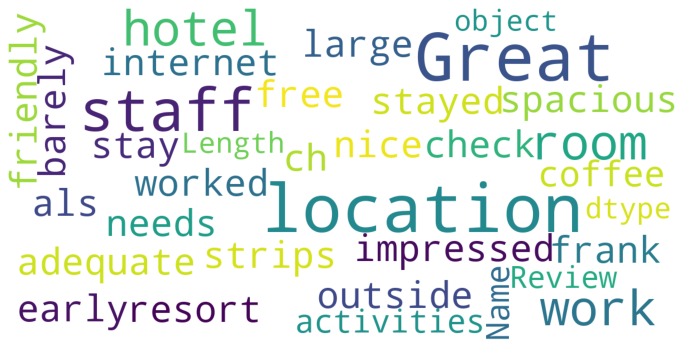

In [68]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
# Creating word cloud 

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(new_df['Review'])

# Bigger the size of the word, the word is more frequent

## Conclusion:

We can conclude that the most of the reviews are positive